In [50]:
import json

In [51]:
import os

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
adj[0]

{'13719': []}

In [66]:
def get_plots(adj, ax):
    edges = [(int(k), int(v)) for k, l in adj.items() for v in l]
    all_nodes = {int(k) for k in adj}
    all_nodes = sorted(all_nodes)

    for a, b in edges:
        k1, k2 = all_nodes.index(a), all_nodes.index(b)
        degs = [k1/(len(all_nodes)) * 2 * np.pi, k2/(len(all_nodes)) * 2 * np.pi]
        ax.plot(np.cos(degs), np.sin(degs))
    for node in all_nodes:
        deg = all_nodes.index(node)/(len(all_nodes)) * 2 * np.pi
        c, s = np.cos(deg)*1.1, np.sin(deg)*1.1
        ax.text(c, s, node,
                horizontalalignment = 'center',
                verticalalignment = 'center')
    t = np.linspace(0, 2*np.pi, 100)
    #ax.plot(np.cos(t), np.sin(t))

In [78]:
figs_path = os.path.join(os.getcwd(), 'figs')

In [130]:
with open(os.path.join(os.getcwd(),'data.json'), 'r') as f:
    adj = json.load(f)

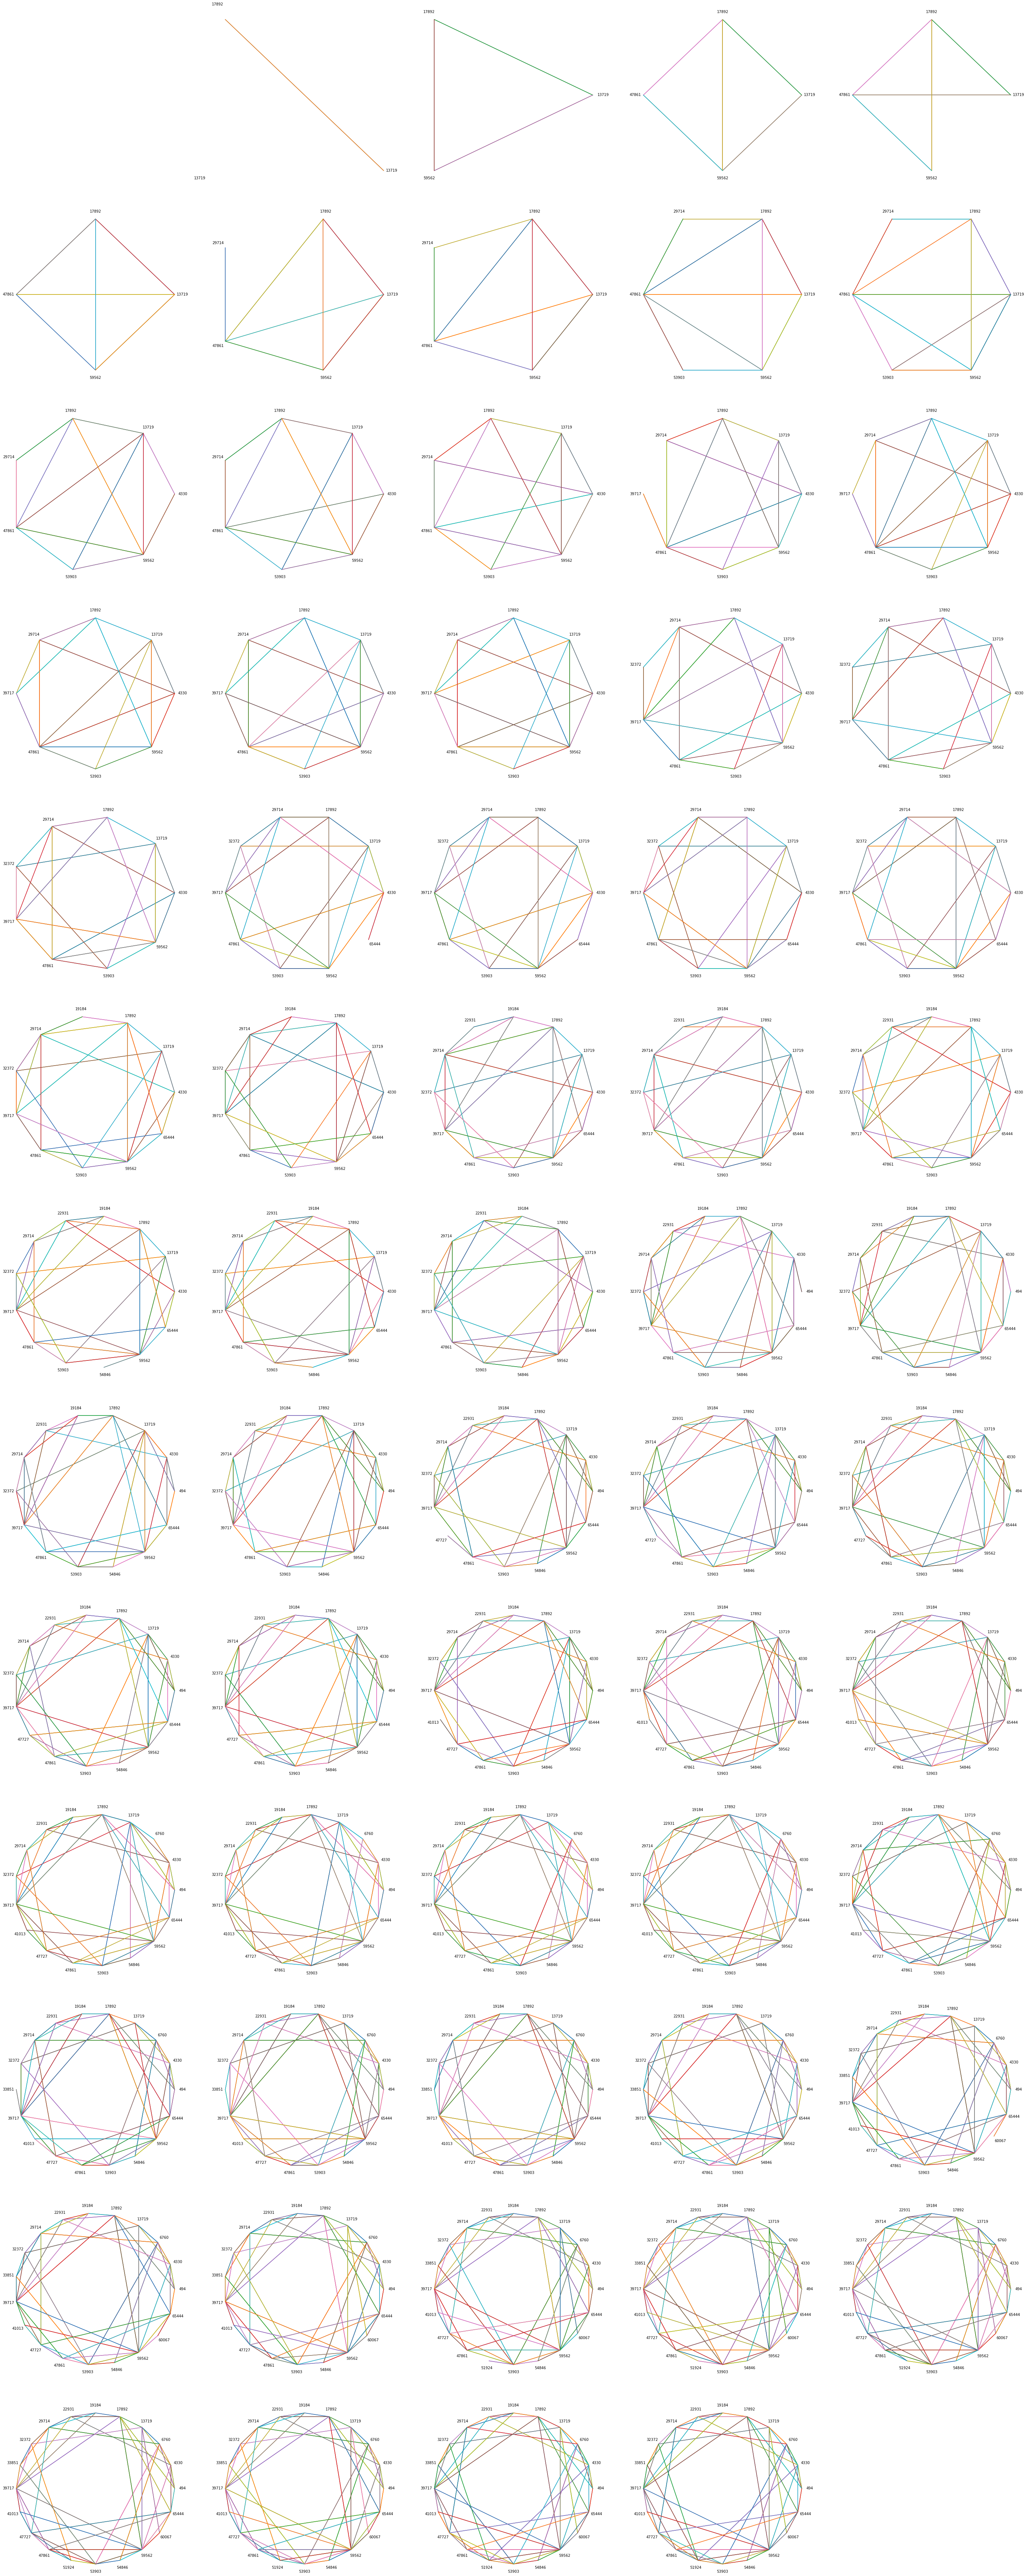

In [132]:
fig, ax = plt.subplots(int(np.ceil(len(adj)/5)), 5, figsize=(50,2*(len(adj) + 5 - (len(adj) % 5))))
for a, axi in zip(adj, ax.flatten()):
    get_plots(a, axi)
for axi in ax.flatten():
    axi.axis('off')
plt.savefig(os.path.join(figs_path, 'chord-fingers.png'))
plt.show()

In [116]:
def check_good(adj):
    m = 8
    #check that each person has good finger table.
    edges = [(int(k), int(v)) for k, l in adj.items() for v in l]
    all_nodes = {int(k) for k in adj}
    all_nodes = sorted(all_nodes)
    for node in all_nodes:
        print('this node', node)
        should = set()
        #make sure that finger table is right.
        connected = {int(k) for k in adj[str(node)]}
        #want to check that all fingers are in adj[node]
        rotated_nodes = [(n - node) % 4**m for n in all_nodes]
        my_index = rotated_nodes.index(0)
        rotated_nodes = rotated_nodes[my_index+1:] + rotated_nodes[:my_index]
        print([(n+node) % 4**m for n in rotated_nodes])
        for i in range(m):
            plus = 4 ** i
            #get node that is >= plus+node
            #do rotation
            for ele in rotated_nodes:
                if ele >= plus:
                    should.add((ele+node) % 4 ** m)
                    break
        print(should)
        print(connected)
        if len(should - connected) > 0:
            print('bad')
            return
    print('good')

In [131]:
check_good(adj[-1])

this node 494
[4330, 6760, 13719, 17892, 19184, 22931, 29714, 32372, 33851, 39717, 41013, 47727, 47861, 51924, 53903, 54846, 59562, 60067, 65444]
{6760, 4330, 17892}
{6760, 4330, 65444, 17892}
this node 4330
[6760, 13719, 17892, 19184, 22931, 29714, 32372, 33851, 39717, 41013, 47727, 47861, 51924, 53903, 54846, 59562, 60067, 65444, 494]
{6760, 22931, 13719}
{65444, 6760, 59562, 494, 22931, 51924, 13719}
this node 6760
[13719, 17892, 19184, 22931, 29714, 32372, 33851, 39717, 41013, 47727, 47861, 51924, 53903, 54846, 59562, 60067, 65444, 494, 4330]
{29714, 13719}
{4330, 494, 53903, 29714, 13719, 54846}
this node 13719
[17892, 19184, 22931, 29714, 32372, 33851, 39717, 41013, 47727, 47861, 51924, 53903, 54846, 59562, 60067, 65444, 494, 4330, 6760]
{32372, 17892}
{60067, 17892, 6760, 59562, 4330, 32372}
this node 17892
[19184, 22931, 29714, 32372, 33851, 39717, 41013, 47727, 47861, 51924, 53903, 54846, 59562, 60067, 65444, 494, 4330, 6760, 13719]
{19184, 22931, 39717}
{65444, 39717, 59562, 

In [118]:
13719-4330

9389

In [121]:
print([4330 + 4 ** i for i in range(8)])

[4331, 4334, 4346, 4394, 4586, 5354, 8426, 20714]
